# Customer Acquisition Cost

- **Customer Acquisition Cost (CAC)** Analysis is a critical aspect of business strategy where Data Science plays a vital role. ``CAC`` refers to the cost company incurs to acquire a new customer. Understanding and optimizing this cost is crucial for sustainable growth and profitability. If you want to learn how to analyze the customer acquisition cost of a business, this article is for you. In this article, I’ll take you through the task of Customer Acquisition Cost Analysis using Python.

## Customer Acquisition Cost Analysis: Process We Can Follow
- Customer Acquisition Cost Analysis is a valuable tool for businesses to assess the efficiency and effectiveness of their customer acquisition efforts. It helps make informed decisions about resource allocation and marketing strategies, ultimately contributing to the company’s growth and profitability.

- Below is the process we can follow for the task of customer acquisition cost analysis as a Data Science professional:

  - Begin by collecting relevant data related to customer acquisition expenses.
  - Segment your customer acquisition costs to understand which channels or strategies are driving customer acquisition.
  - Identify key metrics that will help you calculate CAC.
  - Calculate CAC for each customer acquisition channel or strategy.
  - Analyze and find patterns to optimize your CAC.

## Customer Acquisition Cost Analysis using Python

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\Sai Rohit Basantam\Downloads\customer_acquisition_cost_dataset.csv")

In [3]:
df.head()

,Customer_ID,Marketing_Channel,Marketing_Spend,New_Customers
0,CUST0001,Email Marketing,3489.027844,16
1,CUST0002,Online Ads,1107.865808,33
2,CUST0003,Social Media,2576.081025,44
3,CUST0004,Online Ads,3257.567932,32
4,CUST0005,Email Marketing,1108.408185,13


The dataset includes the following columns:
- **Customer_ID**: Unique identifiers for customers.
- **Marketing_Channel**: The marketing channel through which customers were acquired (e.g., Email Marketing, Online Ads, Social Media).
- **Marketing_Spend**: The amount of money spent on marketing for each channel.
- **New_Customers**:  The number of new customers acquired through each marketing channel.nel.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        500 non-null    object 
 1   Marketing_Channel  500 non-null    object 
 2   Marketing_Spend    500 non-null    float64
 3   New_Customers      500 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [5]:
df.describe(include='all')

,Customer_ID,Marketing_Channel,Marketing_Spend,New_Customers
count,500,500,500.000000,500.000000
unique,500,4,NaN,NaN
top,CUST0001,Online Ads,NaN,NaN
freq,1,130,NaN,NaN
mean,NaN,NaN,3094.726549,30.070000
std,NaN,NaN,1136.628605,11.754209
min,NaN,NaN,1010.702890,10.000000
25%,NaN,NaN,2131.835093,19.000000
50%,NaN,NaN,3155.976673,31.000000
75%,NaN,NaN,4027.494116,40.000000


#### The dataset consists of 500 records and contains the following columns:
- **Customer_ID** : A unique identifier for each customer (500 unique values).
- **Marketing_Channel**: The platform used for customer acquisition, with 4 different channels. The most frequent channel is "Online Ads" (130   occurrences).
- **Marketing_Spend**: The amount spent on marketing per customer.
  
  - The average spend is $3,094.73, with a standard deviation of $1,136.63.
  - The minimum spend is $1,010.70, while the maximum spend is $4,999.63.
  - The median (50th percentile) spend is $3,155.98.
-
- **New_Customers**: The number of new customers acquired.
  - The average number of new customers is 30.07, with a standard deviation of 11.75.
  - The minimum is 10, and the maximum is 50.
  - The median (50th percentile) is 31.
-
- The data doesn't have any outliers.
- The data doesn't have any Null Values. 
- We should change the column Names.

In [6]:
# making columns into lower.

df.columns = [i.lower() for i in df.columns]

In [7]:
# checking for duplicates

df.duplicated().sum()

0

In [8]:
# checking for null values 

df.isnull().sum()

customer_id          0
marketing_channel    0
marketing_spend      0
new_customers        0
dtype: int64

## Marketing_Channel

In [9]:
# checking if any duplicates in marketing_channel grouping customers_id

(df.groupby('customer_id')['marketing_channel'].count()>1).sum()

0

In [10]:
# checking for null values

df[df['marketing_channel'].isnull()]

,customer_id,marketing_channel,marketing_spend,new_customers


In [11]:
# checking for spellings wheather any special charecter or unwanted charecter has occurred in it 

df['marketing_channel'].unique()

array(['Email Marketing', 'Online Ads', 'Social Media', 'Referral'],
      dtype=object)

## Marketing_Spend

In [12]:
df['marketing_spend'].isnull().sum()

0

## New_Customers

In [13]:
df['new_customers'].isnull().sum()

0

# Univariant Analysis

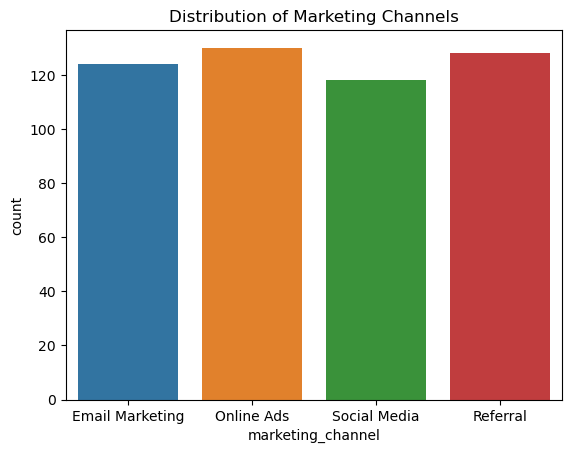

In [14]:
# Distribution of Marketing Channels

sns.countplot(x='marketing_channel', data=df)
plt.title('Distribution of Marketing Channels')
plt.show()

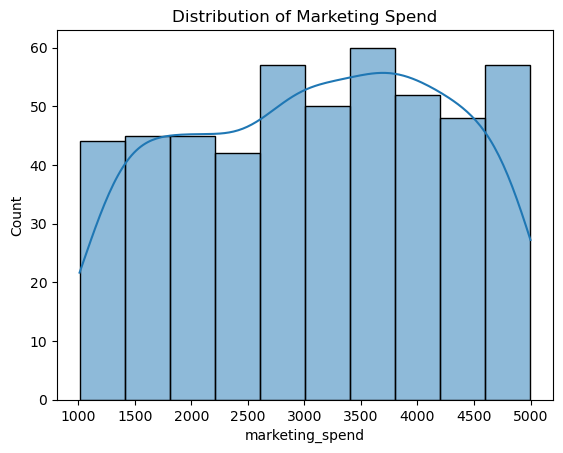

In [15]:
# Distribution of Marketing Spend

sns.histplot(df['marketing_spend'], kde=True)
plt.title('Distribution of Marketing Spend')
plt.show()

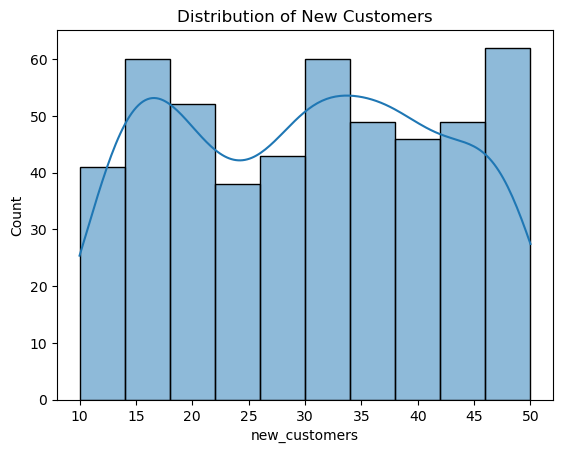

In [16]:
# Distribution of New Customers

sns.histplot(df['new_customers'], kde=True)
plt.title('Distribution of New Customers')
plt.show()

# Bivariant Analysis

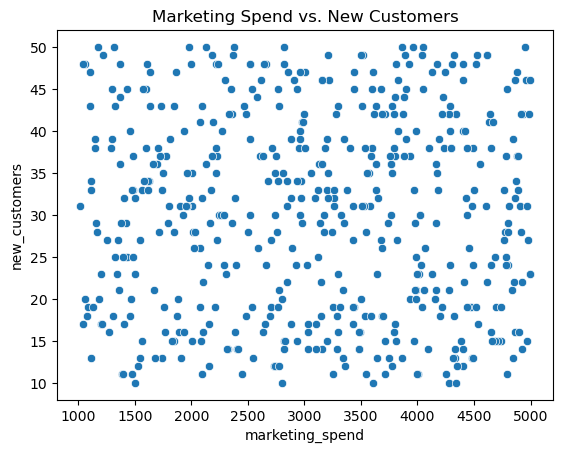

In [17]:
# Scatter plot of Marketing Spend vs. New Customers

sns.scatterplot(x='marketing_spend', y='new_customers', data=df)
plt.title('Marketing Spend vs. New Customers')
plt.show()

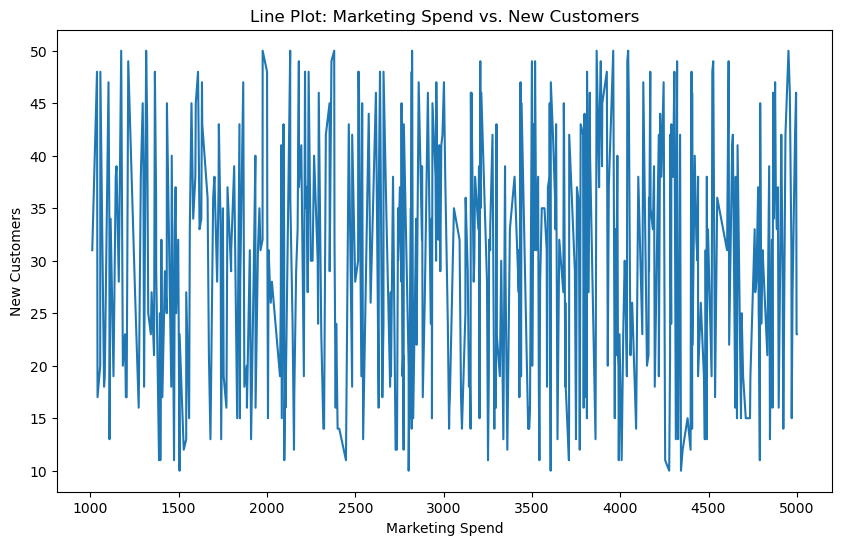

In [18]:
# Line plot of Marketing Spend vs. New Customers
plt.figure(figsize=(10, 6))
sns.lineplot(x='marketing_spend', y='new_customers', data=df)
plt.title('Line Plot: Marketing Spend vs. New Customers')
plt.xlabel('Marketing Spend')
plt.ylabel('New Customers')
plt.show()

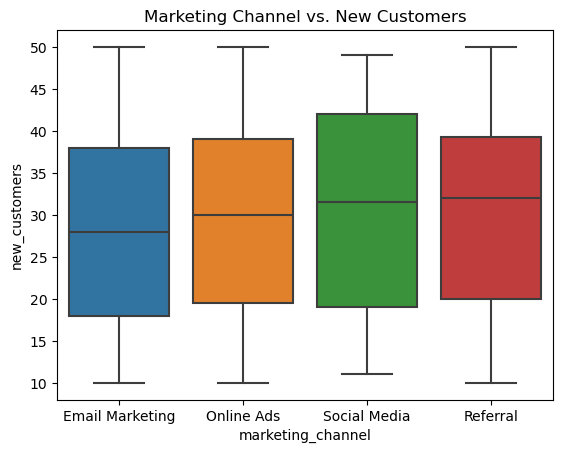

In [19]:
# Box plot of Marketing Channel vs. New Customers

sns.boxplot(x='marketing_channel', y='new_customers', data=df)
plt.title('Marketing Channel vs. New Customers')
plt.show()

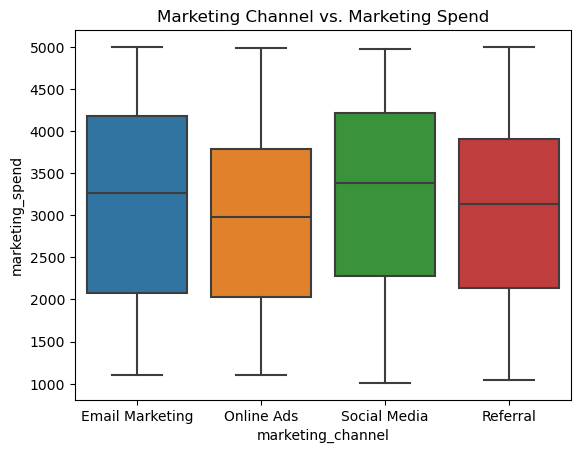

In [20]:
# Box plot of Marketing Channel vs. Marketing Spend

sns.boxplot(x='marketing_channel', y='marketing_spend', data=df)
plt.title('Marketing Channel vs. Marketing Spend')
plt.show()

In [21]:
df.groupby('marketing_channel')['marketing_spend'].max()

marketing_channel
Email Marketing    4998.289668
Online Ads         4989.703692
Referral           4999.631314
Social Media       4970.768175
Name: marketing_spend, dtype: float64

# Multivariant Analysis

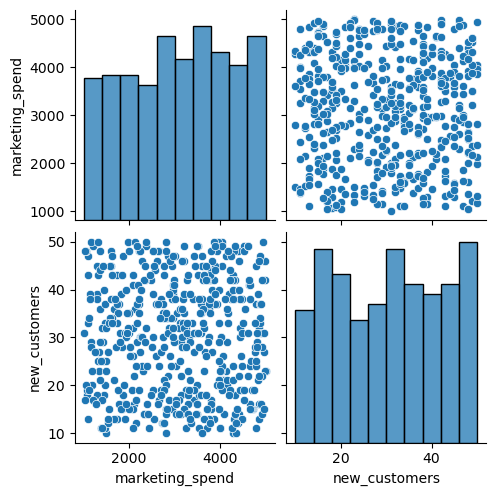

In [22]:
# Pairplot to visualize relationships between numerical variables
sns.pairplot(df)
plt.show()

C:\Users\Sai Rohit Basantam\AppData\Local\Temp\ipykernel_30120\1195288177.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


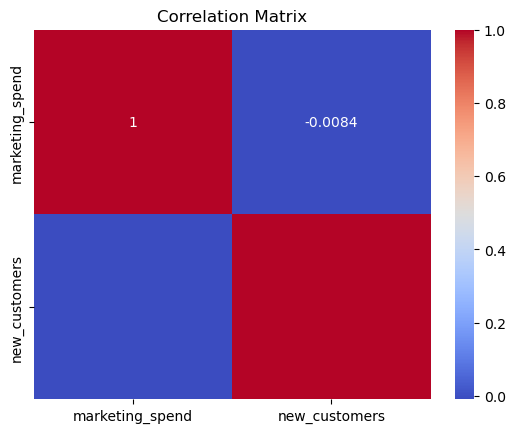

In [23]:
# Correlation matrix

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [24]:
# CAC is a key metric that measures the cost of acquiring a new customer.

# Calculate CAC for each marketing channel

df['CAC'] = df['marketing_spend'] / df['new_customers']

In [25]:
df.head()

,customer_id,marketing_channel,marketing_spend,new_customers,CAC
0,CUST0001,Email Marketing,3489.027844,16,218.064240
1,CUST0002,Online Ads,1107.865808,33,33.571691
2,CUST0003,Social Media,2576.081025,44,58.547296
3,CUST0004,Online Ads,3257.567932,32,101.798998
4,CUST0005,Email Marketing,1108.408185,13,85.262168


In [26]:
# Average CAC by Marketing Channel
avg_cac_by_channel = df.groupby('marketing_channel')['CAC'].mean()
print(avg_cac_by_channel)

marketing_channel
Email Marketing    132.913758
Online Ads         122.135938
Referral           119.892174
Social Media       126.181913
Name: CAC, dtype: float64


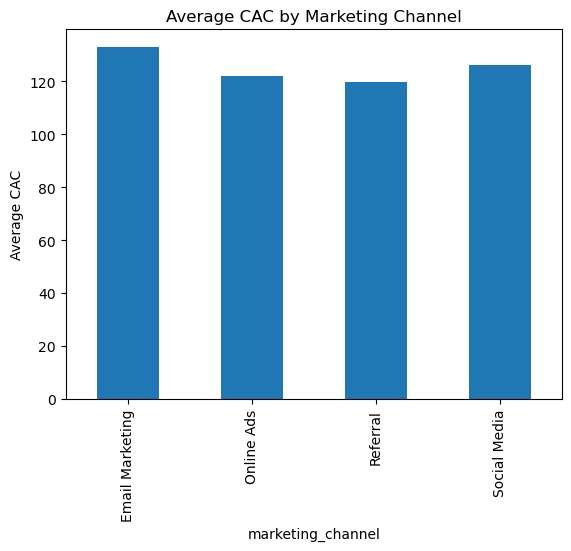

In [27]:
# Bar plot of Average CAC by Marketing Channel

avg_cac_by_channel.plot(kind='bar')
plt.title('Average CAC by Marketing Channel')
plt.ylabel('Average CAC')
plt.show()

So, the customer acquisition cost of Email marketing is the highest and social media is the lowest. Now, let’s have a look at the relationship between new customers acquired and CAC:

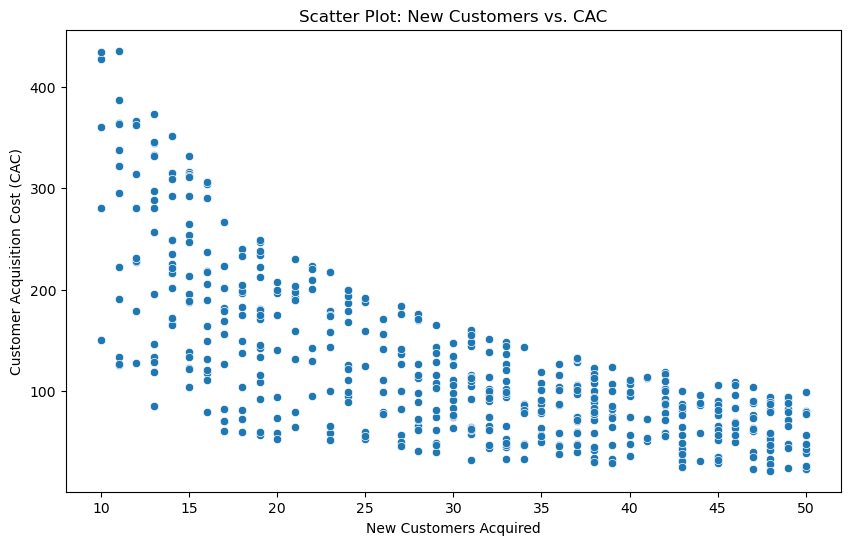

In [28]:
# Scatter plot of New Customers vs. CAC
plt.figure(figsize=(10, 6))
sns.scatterplot(x='new_customers', y='CAC', data=df)
plt.title('Scatter Plot: New Customers vs. CAC')
plt.xlabel('New Customers Acquired')
plt.ylabel('Customer Acquisition Cost (CAC)')
plt.show()

So, the negative slope of the trendline in the above graph suggests that there is a tendency for channels with a higher number of new customers to have a lower CAC. In other words, as marketing efforts become more effective in acquiring customers, the cost per customer tends to decrease.

In [29]:
summary_stats = df.groupby('marketing_channel')['CAC'].describe()
print(summary_stats)

                   count        mean        std        min        25%  \
marketing_channel                                                       
Email Marketing    124.0  132.913758  89.597107  23.491784  68.226195   
Online Ads         130.0  122.135938  79.543793  24.784414  62.207753   
Referral           128.0  119.892174  74.101916  22.012364  71.347939   
Social Media       118.0  126.181913  77.498788  21.616453  75.633389   

                          50%         75%         max  
marketing_channel                                      
Email Marketing    106.940622  177.441898  434.383446  
Online Ads          97.736027  163.469540  386.751285  
Referral            99.835688  137.577935  366.525209  
Social Media       102.620356  167.354709  435.487346  


## Insights from This Table:

-  Use the mean CAC values to compare the average cost of customer acquisition across different Marketing Channels. For example, if minimizing CAC a priority, you may want to focus on channels with lower average CAC values
- Use the standard deviation to assess the consistency of CAC within each channel. Higher standard deviations suggest greater variability, which may    require further investigation to understand the reasons behind the fluctuation in costs.
- Use quartiles to understand a sense of the distribution of CAC values. For example, if you want to target cost-effective customer acquisition, you    might focus on channels where the first quartile (25%) has relatively low CAC values.
- Similarly, the minimum and maximum CAC values give you an idea of the range of costs associated with each channel, helping you understand the         potential cost extremes.mes.



   - Email Marketing has the highest average CAC (~132.91), meaning it is the most expensive method to acquire customers.
   - Referral Marketing has the lowest median CAC (~99.83), making it more cost-effective.
   - Online Ads & Social Media have similar CAC distributions, but Social Media has slightly higher variation (std = 77.49).
   - Max CAC for Social Media (435.48) and Email (434.38) shows some high-cost outliers in these categories.

In [30]:
# Now, let’s calculate the conversion rate of this marketing campaign:

df['conversion_rate'] = df['new_customers'] / df['marketing_spend'] * 100

In [31]:
df.head()

,customer_id,marketing_channel,marketing_spend,new_customers,CAC,conversion_rate
0,CUST0001,Email Marketing,3489.027844,16,218.064240,0.458580
1,CUST0002,Online Ads,1107.865808,33,33.571691,2.978700
2,CUST0003,Social Media,2576.081025,44,58.547296,1.708021
3,CUST0004,Online Ads,3257.567932,32,101.798998,0.982328
4,CUST0005,Email Marketing,1108.408185,13,85.262168,1.172853


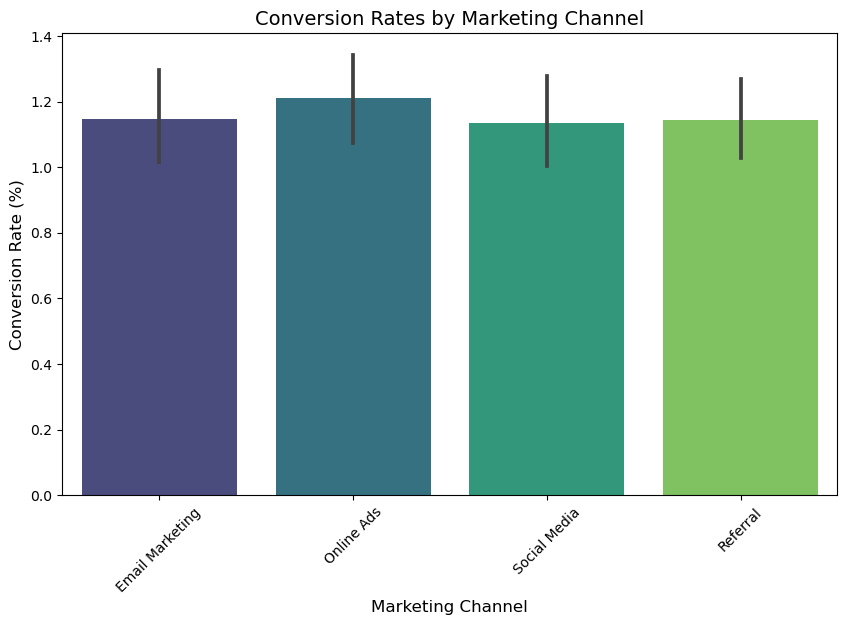

In [32]:
plt.figure(figsize=(10, 6))

# Create the bar plot using Seaborn
sns.barplot(data=df, x="marketing_channel", y="conversion_rate", palette="viridis")

# Add title and labels
plt.title("Conversion Rates by Marketing Channel", fontsize=14)
plt.xlabel("Marketing Channel", fontsize=12)
plt.ylabel("Conversion Rate (%)", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

So, we can see that the conversion rates of online ads are better than all other channels.

Now, let’s calculate the break-even customers for this marketing campaign. Break-even customers refer to the number of new customers that a company needs to acquire through a specific marketing channel to cover the costs associated with that marketing channel. When the actual number of new customers acquired through the channel exceeds the break-even number, it indicates that the marketing efforts are generating more revenue than the costs, resulting in a profit. Here’s how to find break-even customers for each marketing channel:

In [33]:
df['break_even_customers'] = df['marketing_spend'] / df['CAC']

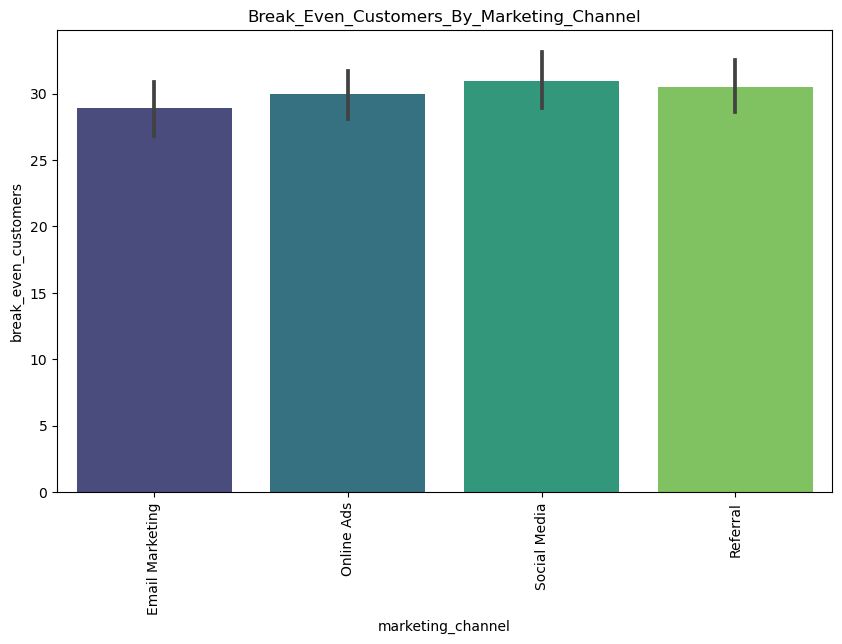

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x="marketing_channel",y="break_even_customers",palette='viridis')
plt.title('Break_Even_Customers_By_Marketing_Channel')
plt.xticks(rotation=90)
plt.show()

Now, let’s compare the actual customers acquired with the break-even customers for each marketing channel:

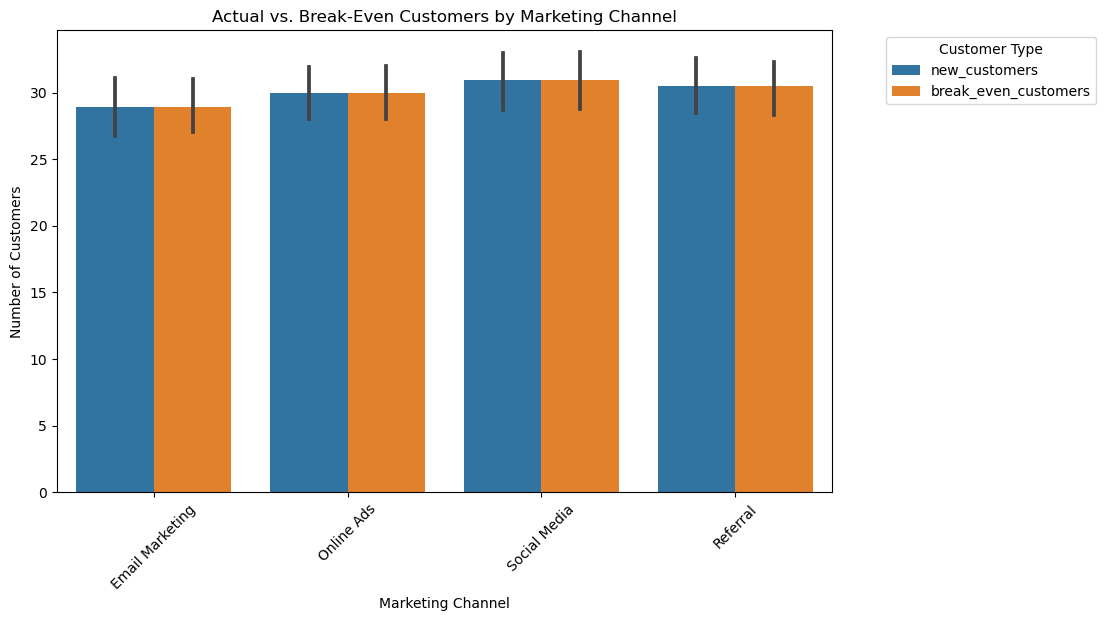

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert data into long format for side-by-side bars
data_long = df.melt(id_vars=['marketing_channel'], 
                      value_vars=['new_customers', 'break_even_customers'], 
                      var_name='Type', 
                      value_name='Customers')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=data_long, x="marketing_channel", y="Customers", hue="Type")

# Add title and labels
plt.title("Actual vs. Break-Even Customers by Marketing Channel")
plt.xlabel("Marketing Channel")
plt.ylabel("Number of Customers")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Move the legend to the top-right outside the graph
plt.legend(title="Customer Type", loc='upper right', bbox_to_anchor=(1.35, 1))

# Show the plot
plt.show()


So, this shows a positive result of the marketing campaign as the actual customers acquired from all marketing channels exactly match the break-even customers. If the actual customers acquired were short of the break-even point, it would have indicated a need to reassess marketing strategies or allocate additional resources to those channels.

# SUMMARY

So this is how you can perform Customer Acquisition Cost Analysis using Python. Customer Acquisition Cost Analysis is a valuable tool for businesses to assess the efficiency and effectiveness of their customer acquisition efforts. It helps make informed decisions about resource allocation and marketing strategies, ultimately contributing to the company’s growth and profitability. I hope you liked this article on Customer Acquisition Cost Analysis using Python. Feel free to ask valuable questions in the comments section below.